# HW 3 #

## 1.1 Heat Capacity of Solids ##

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import warnings
warnings.filterwarnings('ignore') #Graph throws warnings for the small values of T close to 0

Text(0, 0.5, 'Heat Capacity(J/mol*K)')

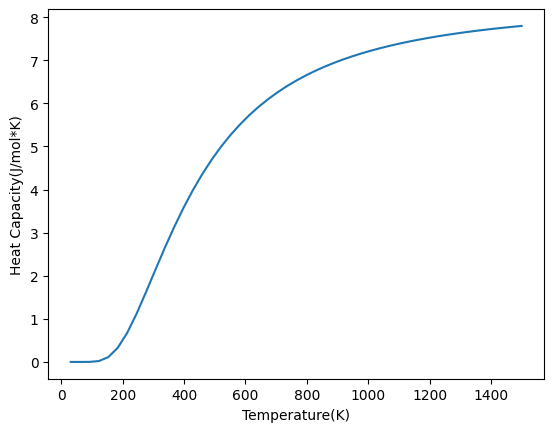

In [ ]:
#Problem 2
Temp = np.linspace(0,1500)
h = 6.62607e-34 #J*s
nu = 2.75e13 #s^-1
k = 1.38065e-23 #J/K
R = 8.314472 #J/K*mol

const = (h*nu)/(k*Temp)
Cap = R*((const)**2)*(np.exp(const)/((np.exp(const)-1)**2))

plt.plot(Temp,Cap)
plt.xlabel('Temperature(K)')
plt.ylabel('Heat Capacity(J/mol*K)')

In [ ]:
#Problem 3

def P(n,T):
    return np.exp((-n*h*nu)/(k*T))*(1-np.exp((-h*nu)/(k*T)))

print(P(1,1500),'n=1 at 1500 K')
print(P(0,1500),'n=0 at 1500 K')
print(P(1,150),'n=1 at 150 K')
print(P(0,150),'n=0 at 150 K')

0.24274790174502242 n=1 at 1500 K
0.5851592523157498 n=0 at 1500 K
0.00015092060049755725 n=1 at 150 K
0.9998490566155972 n=0 at 150 K


## 1.2 Blackbody radiators ##
By treating the sun as a blackbody radiator, Joseph Stefan derived the first reliable estimate of the temperature of the sun’s surface.

### 4. Stefan estimated that the power per unit area radiated from the surface of the sun was 43.5 times greater than that of a metal bar heated to 1950 ̊C. What is the temperature of the sun?

In [ ]:
T_metal = 1950+273 # K
n = 43.5

#Then we use Stefan-Boltzmann law to calculate the Temperature of the sun
T_sun = (n*T_metal**4)**0.25 # K, Stefan-Boltzmann Law
print("The temperature of the sun is {:.3f} K.".format(T_sun))

The temperature of the sun is 5709.023 K.


### 5. Based on this temperature, what wavelength $\lambda$ of light does the sun emit most intensely, in nm? What frequency of light, in s$^{–1}$? What color does this correspond to?

In [ ]:
W_cons = 2897768 # nm*k, Wien's Law
lam_max = W_cons/T_sun # nm
c = 2.99792e8 # m/s
nu = c/(lam_max*1e-9) # s^-1
print('The wavelength of light that the sun emits most intensely is {0:.3f} nm, the frequency is {1:0.3E} s^-1.'.format(lam_max,nu))
print('This is green light.')

The wavelength of light that the sun emits most intensely is 507.577 nm, the frequency is 5.906E+14 s^-1.
This is green light.


The classical physics theory regarding blackbody radiation predicted that an infinite amount of energy is emitted at small wavelengths, which makes no sense from the perspective of energy conservation. Because small wavelengths correspond to the ultraviolet end of the spectrum, this puzzle was known as the ultraviolet catastrophe. Planck assumed that energy is quantized, which means electromagnetic radiation can only be emitted or absorbed in discrete  energy in units of hv = hc/lambda

## 1.3 Photoelectric effect ##

### 1.3.1 ###

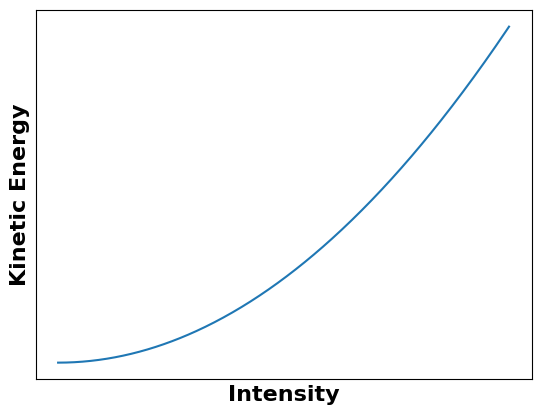

In [ ]:
intensity = np.linspace(0,500,500) # intensity square
ke = intensity**2 # Kinetic energy = energy of the wave = constant*intensity square
plt.plot(intensity,ke)
plt.xlabel('Intensity',fontsize=16,fontweight='bold')
plt.ylabel('Kinetic Energy',fontsize=16,fontweight='bold')
# Removing numbers on both axes
plt.xticks([])  # Remove numbers on the x-axis
plt.yticks([])  # Remove numbers on the y-axis

plt.show()

### 1.3.2 ###

### Gathering data from the problem: ###

In [ ]:
c = 2.99792e8 # value speed of light m/s
wavelength = [263,250,234,218,184] # wavelenght in nanometers
KE = [0.13,0.33,0.68,1.08,2.13] # kinetic energies in eV

In [ ]:
frequency = [] # stores frequencies calculated based on the given wavelengths
for i in wavelength: #iterates over each wavelength in the wavelength list, calculates corresponding frequency
    frequency.append(c/(i*1.0e-9)) # s^-1, frequency = c/wavelength; appending result to frequency list

h, W = np.polyfit(frequency, KE, 1) #linear fitting; slope related to Planck's constant and y-intercept related to
                                    #work function of metal

The workfunction of the metal is 4.598 eV
Planck's constant (h) is 4.127E-15 eV*s


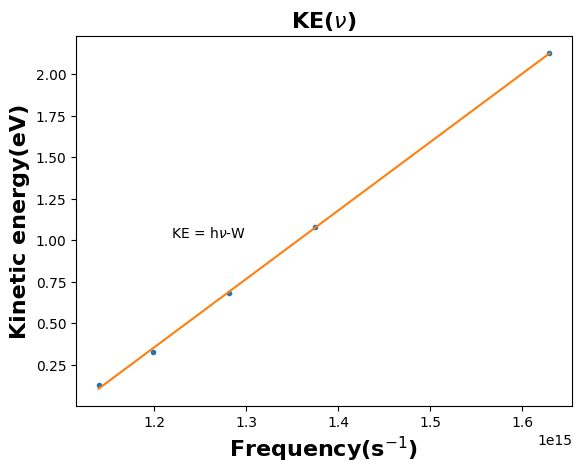

In [ ]:
KE_fit = np.poly1d([0,h,W]) # A 1-D polynomial class representing linear fit done before
print ('The workfunction of the metal is {0:.3f} eV\nPlanck\'s constant (h) is {1:.3E} eV*s'.format(-W,h))
plt.plot(frequency, KE, '.')
plt.plot(frequency, KE_fit(frequency), '-')
plt.xlabel('Frequency(s$^{-1}$)',fontsize=16,fontweight='bold')
plt.ylabel('Kinetic energy(eV)',fontsize=16,fontweight='bold')
plt.text(1.3e15, 1.0, 'KE = h$\\nu$-W', ha='right', va='bottom')
plt.title('KE($\\nu$)',fontsize=16,fontweight='bold')
plt.show()

## 1.4 Diffraction ##

In [ ]:
#Problem 10
lamb = 2.9/10 #Angstrom to nm
hc = 1239.8 #eV/nm

E = (hc)/lamb
print(E,'eV')

4275.172413793103 eV


In [ ]:
#Problem 11
P = 1e-6*6.2415e18 # W=J/s, convert to eV/s

num = P/E
print(num,'photons/s')

1459941119.535409 photons/s


In [ ]:
#Problem 12
m_e= 9.1094e-31 #kg
c = 2.9979e8 #m/s

v = h/(m_e*(lamb/1e9))
print (v,'m/s')
print(v/c)

1.5621675522596458e+25 m/s
5.210872785148423e+16


## 1.5 The Bohr atom ##
Bohr developed the first successful model of the energy spectrum of a hydrogen atom by postulating that electrons can only exist in certain fixed energy “orbits” indexed by the quantum number $n$. (Recall that the equations describing the Bohr atom are in Table 4 of the course outline.)

### 13. Would light need to be absorbed or emitted to cause an electron to jump from the $n$ = 1 to the $n$ = 2 orbit? What wavelength of light does this correspond to?

In [ ]:
#Energy of a Hydrogen molecule
EH = 27.212 # eV

#Energy at each of the orbital
n1 = 1
n2 = 2
E1 = -EH/2/n1**2 # eV
E2 = -EH/2/n2**2 # eV

#Calculating the wavelength
hc = 1240 # eV*nm
deltaE = E2-E1 # eV
wavelength = hc/deltaE # nm
print ('Light needs to be absorbed to cause an electron to jump from the n=1 to n=2 orbit. \nThe wavelength is {:.5f} nm.'.format(wavelength))

Light needs to be absorbed to cause an electron to jump from the n=1 to n=2 orbit. 
The wavelength is 121.51502 nm.


### 14. What is the circumference of the $n$ = 2 orbit? What is the de Broglie wavelength of an electron in the $n$ = 2 orbit? How do these compare?

In [ ]:

#First we calculate the circumference using the given constant

a0 = 0.529177e-10 # m, Bohr radius for hydrogen atom

#calculate the r at the second orbital
r2 = a0*n2**2 # m

#using the circumference formula
l = 2*np.pi*r2 # m, circumference

#constants
k = 2.30708e-28 # J*m, k = e^2/(4*pi*epsilon), the value of the constant is in the course outline.
me = 9.109e-31 # kg, #mass of electron
h = 6.62607e-34 # J*s
hbar = 1.05457e-34 #J*s, reduced Planck constant

#calculate the wavelength
p0 = k*me/hbar # kg*m/s
p2 = p0/n2
wavelength_2 = h/p2 # m
print('The circumference of the n=2 orbit is {0:.5E} m. \nThe de Broglie wavelength of an electron in the n=2 orbit is {1:.5E} m. \nThe relationship is the circumference={2:.2f}*the de Broglie wavelength.'.format(l,wavelength_2,l/wavelength_2))


The circumference of the n=2 orbit is 1.32997E-09 m. 
The de Broglie wavelength of an electron in the n=2 orbit is 6.65010E-10 m. 
The relationship is the circumference=2.00*the de Broglie wavelength.
